In [57]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import darc
from darc.delayed import models
from darc.designs import DARCDesign

from darc.data_plotting import plot_delay_without_front_end_delays
from darc_parameter_recovery import simulated_experiment_trial_loop

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Simulated experiment with `DelaySlice` model

In [59]:
max_trials = 20

design_thing = DARCDesign(max_trials=max_trials,
                          RA=list(100*np.linspace(0.05, 0.95, 100)),
                          DB=[180])

model = models.DelaySlice(n_particles=5000)

# model = model.generate_faux_true_params()
indiff_true = 0.8
α_true = 0.05
model.θ_true = pd.DataFrame.from_dict({'indiff': [indiff_true], 'α': [α_true]})

fitted_model = simulated_experiment_trial_loop(design_thing, model)


Visualise the raw data

(0, 1)

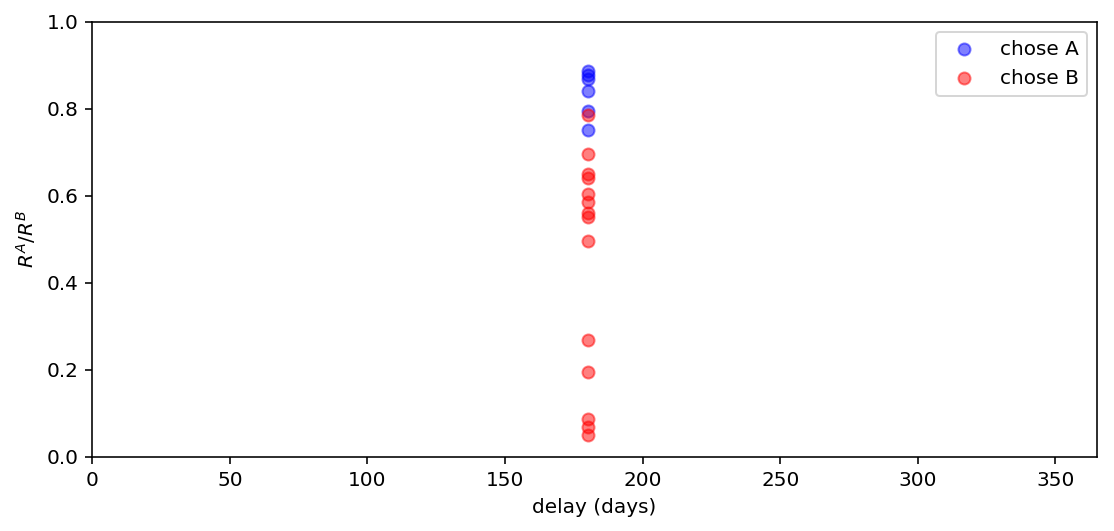

In [60]:
fig, ax = plt.subplots(figsize=(9,4))
plot_delay_without_front_end_delays(ax, design_thing.all_data)
ax.set_xlim([0, 365])
ax.set_ylim([0, 1])

## Posterior predictive checking

In [81]:
def plot_data(all_data):
    x = all_data['RA'].values / all_data['RB'].values
    y = all_data['R'].values
    plt.scatter(x, y, c='k')

In [82]:
Phi = lambda x: norm.cdf(x, loc=0, scale=1)

def Psi(x, indiff, α, ϵ=0.01):
    return ϵ+(1-2*ϵ) * Phi((indiff-x)/α) # TODO: CHECK x is right way around

In [83]:
θpe = fitted_model.get_θ_point_estimate()
indiff_median = θpe['indiff'].values
α_median = θpe['α'].values

In [84]:
x = np.linspace(0, 1, 500)

Text(0, 0.5, 'P(choose B)')

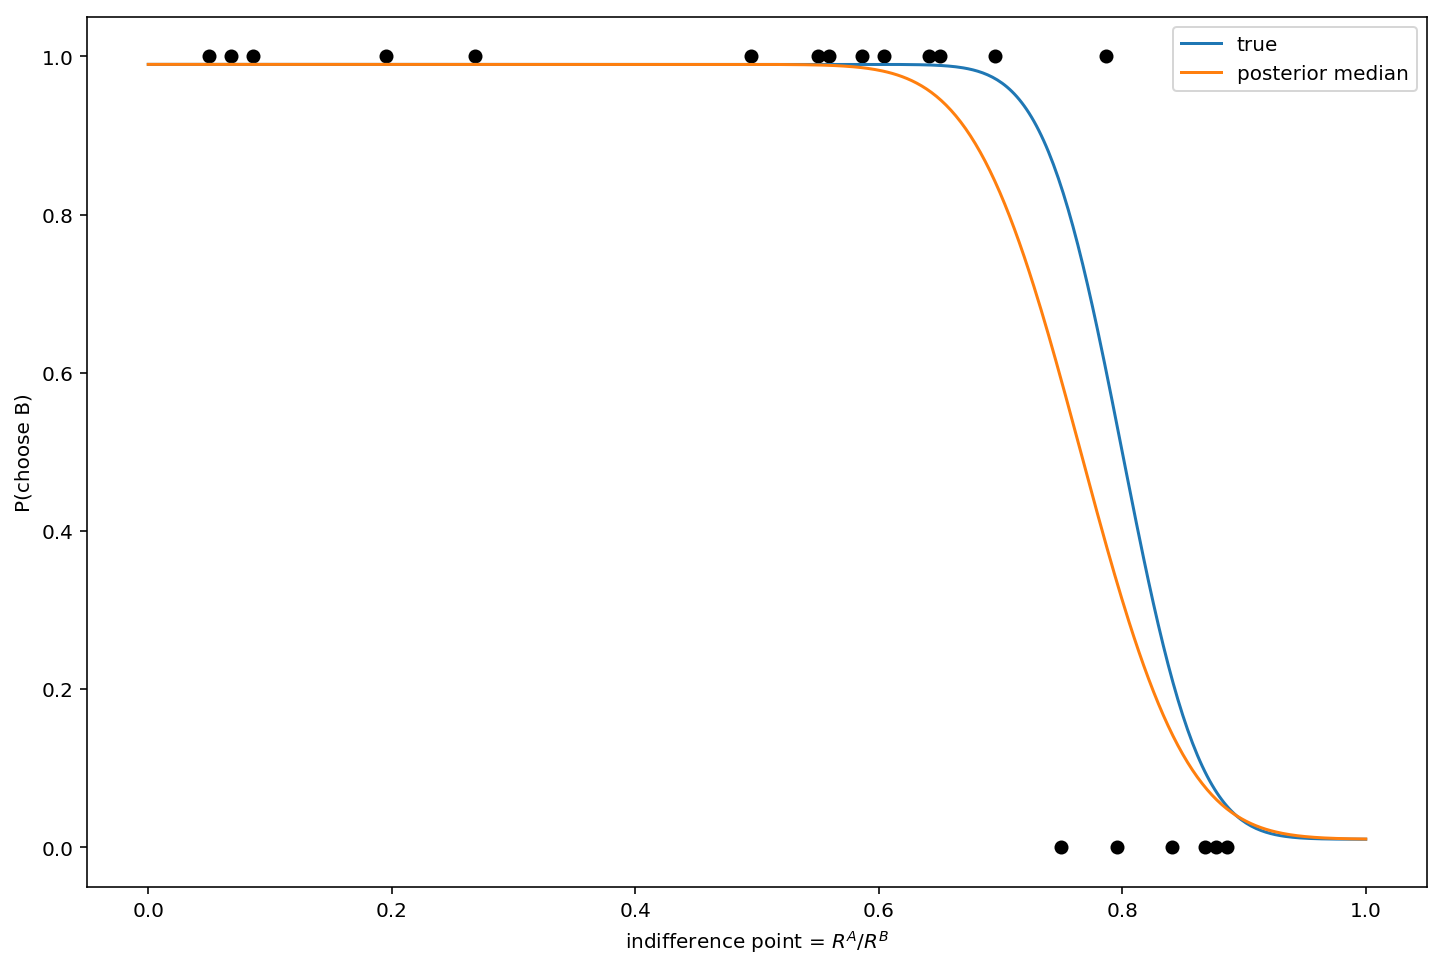

In [86]:
fig, ax = plt.subplots(figsize=(12,8))

x = np.linspace(0, 1, 500)

y = Psi(x, indiff_true, α_true, ϵ=0.01)
plt.plot(x,y, label='true')

y = Psi(x, indiff_median, α_median, ϵ=0.01)
plt.plot(x,y, label='posterior median')

plot_data(design_thing.all_data)

ax.set_ylim([0-0.05, 1+0.05])
ax.legend()

ax.set_xlabel('indifference point = $R^A/R^B$')
ax.set_ylabel('P(choose B)')